In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### k-neighbors regression

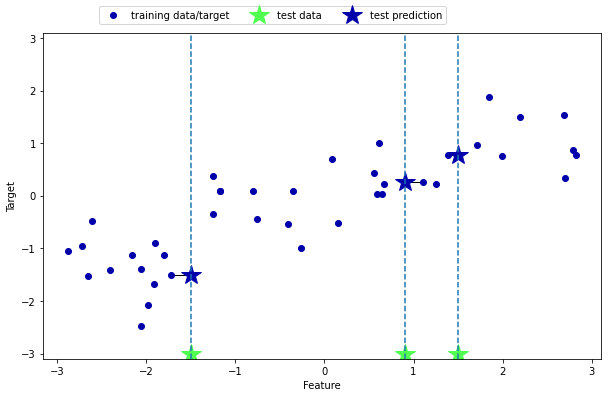

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

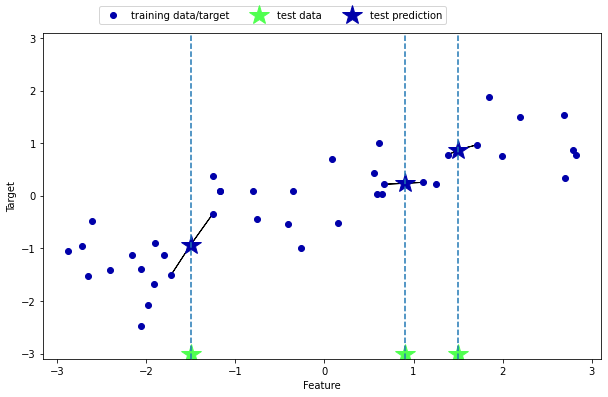

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

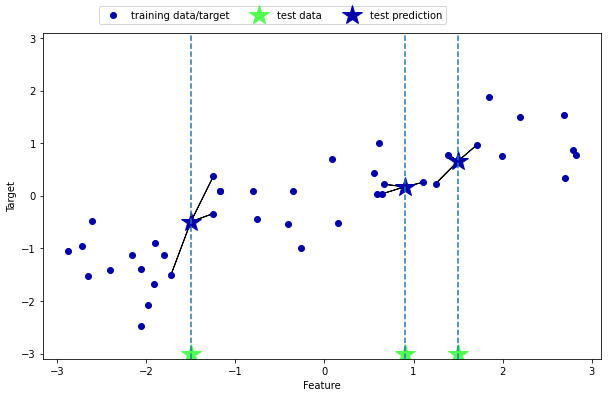

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

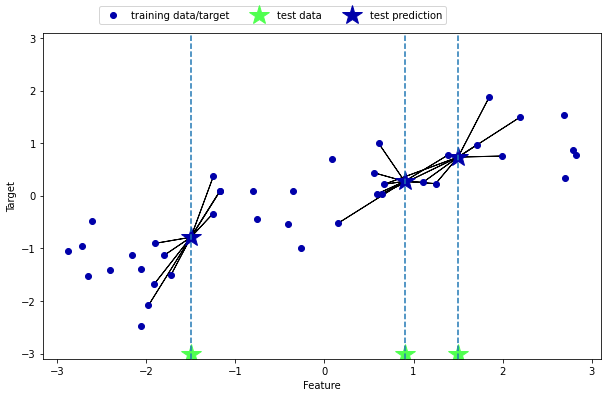

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=9)

Text(0, 0.5, 'Target')

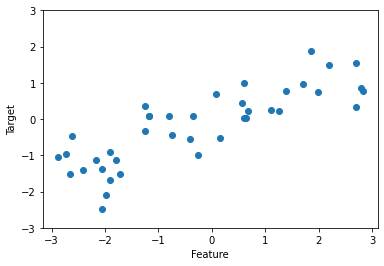

In [7]:
X, Y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, Y,'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=3)

In [10]:
print("Test set predictions: ", reg.predict(xtest))

Test set predictions:  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [14]:
# give it xtest --predict--> ytest' then compare to ytest
print("Test set R^2: {:.2f}".format(reg.score(xtest, ytest)))

Test set R^2: 0.83


## Analalyzing KNeighborsReggressor

D:\Programming\Python\sample projects\ML\senv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


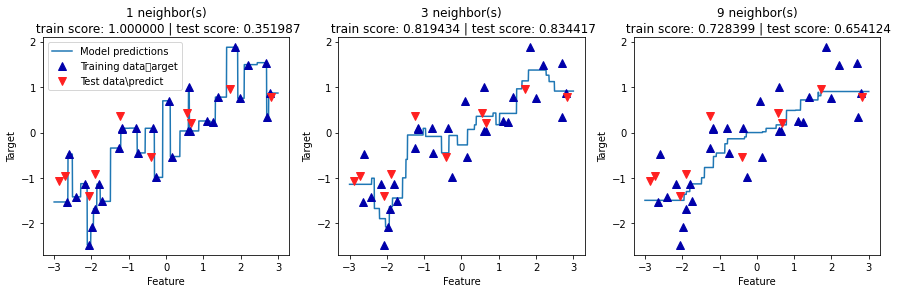

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 datapoints, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # shape: (1000, 1)
for n_neighbor, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbor)
    reg.fit(xtrain, ytrain)
    ax.plot(line, reg.predict(line)) # predict all features
    ax.plot(xtrain, ytrain, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(xtest, ytest, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:2f} | test score: {:2f}".format(
        n_neighbor, reg.score(xtrain, ytrain), reg.score(xtest, ytest)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data\target", "Test data\predict"], loc="best")